In [ ]:
import numpy as np
import pandas as pd
import os
!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import sqlite3 #connect to databse using this
import scipy
import seaborn
from scipy.stats import zscore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.3 MB/s eta 0:00:00


## Import the Data


Note that you would need to change the path to the specific location in your google drive that includes the data.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# conn = sqlite3.connect('/content/drive/MyDrive/Receptor/All_Receptors (2).db')
# conn = sqlite3.connect('/content/drive/My Drive/TEAM_13_ALKERMES/DATASETS/All_Receptors.db') # Note that here, you should change the path to your folder
conn = sqlite3.connect('/content/drive/My Drive/BTTAI/TEAM_13_ALKERMES/DATASETS/All_Receptors.db')

Mounted at /content/drive


#Load Data with SQL

In [ ]:
# Create a cursor object to interact with the database
cursor = conn.cursor()

# Check all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Display the tables
print("Tables in the database:", tables)

Tables in the database: [('Assays5-HT1a',), ('Assays5-HT2a',), ('Assays5-HT2b',), ('Assays5-HT2c',), ('AssaysD2',), ('Bioactivity5-HT1a',), ('Bioactivity5-HT2a',), ('Bioactivity5-HT2b',), ('Bioactivity5-HT2c',), ('BioactivityD2',)]


## Enter your endpoint variables


In [ ]:
endpoint_name = "Bioactivity5-HT1a" #Enter name here (ex. BioactivityD2)
columns_to_keep = [
      'Molecule ChEMBL ID', 'AlogP', 'Compound Key', 'Smiles',
      'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value',
      'Assay ChEMBL ID', 'Assay Description', 'BAO Format ID',
      'BAO Label', 'Assay Tissue ChEMBL ID', 'Assay Type', 'Assay Tissue Name', 'Assay Cell Type', 'Canonical_SMILES','Target Organism'
  ]
assays_name= "Assays5-HT1a" #Enter name here

In [ ]:
def load_data(conn, endpoint_name):
    # SQL query to load data
    query = f"SELECT * FROM '{endpoint_name}'"

    # Use pandas to read the SQL query into a DataFrame
    df = pd.read_sql(query, conn)

    # Display the first few rows of the table
    print("The first few rows of the table:")
    print(df.head())
    #number of compounds
    print("Number of compounds:", df.shape[0])
    print("")

    # Query to get all column names from your table
    schema_query = f"PRAGMA table_info('{endpoint_name}');"
    df_columns = pd.read_sql(schema_query, conn)

    # Print the column names
    print("Column Names:", df_columns['name'].tolist())

    return df

### Run me!

In [ ]:
data = load_data(conn, endpoint_name)
data.head()

The first few rows of the table:
  Molecule ChEMBL ID Molecule Name Molecule Max Phase Molecular Weight  \
0       CHEMBL542139          None               None           488.46   
1       CHEMBL263881     LYSERGIDE                2.0           323.44   
2       CHEMBL596297          None               None           454.57   
3       CHEMBL594829          None               None           379.44   
4        CHEMBL81095          None               None           413.49   

  #RO5 Violations AlogP   Compound Key  \
0               0  4.08  15, SB-271046   
1               0  2.91            LSD   
2               0  4.32         (+)-54   
3               0  3.08         rac-41   
4               0  2.93              5   

                                              Smiles Standard Type  \
0  COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...            Ki   
1  CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...            Ki   
2  N#Cc1ccc2[nH]cc(CCCCN(CC3CC3)C3COc4ccc5c(c4C3)...       

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL542139,None,None,488.46,0,4.08,"15, SB-271046",COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1132410,1,Scientific Literature,J Med Chem,1999.0,CHEMBL3307715,None,None,None
1,CHEMBL263881,LYSERGIDE,2.0,323.44,0,2.91,LSD,CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...,Ki,'=',...,SINGLE PROTEIN,CHEMBL1145901,1,Scientific Literature,J Med Chem,2003.0,CHEMBL3307715,None,None,None
2,CHEMBL596297,None,None,454.57,0,4.32,(+)-54,N#Cc1ccc2[nH]cc(CCCCN(CC3CC3)C3COc4ccc5c(c4C3)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1153150,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,CHEMBL3308072,None,None,None
3,CHEMBL594829,None,None,379.44,0,3.08,rac-41,O=C1NCc2ccc3c(c21)CC(NCCCc1c[nH]c2ccc(F)cc12)CO3,Emax,'=',...,SINGLE PROTEIN,CHEMBL1153150,1,Scientific Literature,Bioorg Med Chem Lett,2010.0,CHEMBL3308072,None,None,None
4,CHEMBL81095,None,None,413.49,0,2.93,5,O=C(NCCCCN1CCN(c2cccc3c2OCCO3)CC1)c1ccc(F)cc1,Efficacy,'=',...,SINGLE PROTEIN,CHEMBL1130957,1,Scientific Literature,Bioorg Med Chem Lett,1998.0,CHEMBL3308072,None,None,None


# Plotting Distribution of Assay Data (Assay Type)


F - Functional

B - Binding

A - ADME

T - Toxicity

P - Physicochemical

U - Unassigned


In [ ]:
def plot_assay_distribution(conn, endpoint_name):
    # SQL query to load assay data
    assay_type_query = f"SELECT [Assay Type] FROM '{endpoint_name}'"

    # Load assay data
    data = pd.read_sql(assay_type_query, conn)

    # Plot a histogram of the assay data
    data['Assay Type'].hist(bins=30)  # Adjust the number of bins as necessary
    plt.title('Distribution of Assay Data ([Assay Type])')
    plt.xlabel('Activities')
    plt.ylabel('Frequency')
    plt.show()

### Run me!

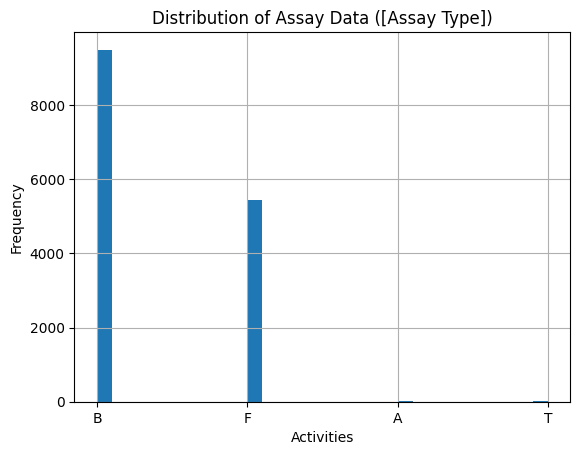

In [ ]:
plot_assay_distribution(conn, endpoint_name)

# Create the Canonical SMILES column

convert SMILES to Canonical SMILES
apply: applys a fnc to every element in series
lambda: str represents each SMILES string in column
Chem.MolFromSmiles: RDKit takes string and converts to molecular object
Initialize an empty list to store canonical SMILES


In [ ]:
def create_smiles(df):
    canonical_smiles_list = []

    # Go through SMILES strings
    for smiles in df['Smiles']:
        try:
            # Attempt to convert the SMILES string to a canonical SMILES
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
            else:
                canonical_smiles = None
        except:
            # Set canonical_smiles to None
            canonical_smiles = None

        canonical_smiles_list.append(canonical_smiles)

    df['Canonical_SMILES'] = canonical_smiles_list
    return df

### Run me!

In [ ]:
data = create_smiles(data)
data[['Smiles', 'Canonical_SMILES']].head()

,Smiles,Canonical_SMILES
0,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...,COc1ccc(NS(=O)(=O)c2sc3ccc(Cl)cc3c2C)cc1N1CCNC...
1,CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...,CCN(CC)C(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)C[C@H...
2,N#Cc1ccc2[nH]cc(CCCCN(CC3CC3)C3COc4ccc5c(c4C3)...,N#Cc1ccc2[nH]cc(CCCCN(CC3CC3)C3COc4ccc5c(c4C3)...
3,O=C1NCc2ccc3c(c21)CC(NCCCc1c[nH]c2ccc(F)cc12)CO3,O=C1NCc2ccc3c(c21)CC(NCCCc1c[nH]c2ccc(F)cc12)CO3
4,O=C(NCCCCN1CCN(c2cccc3c2OCCO3)CC1)c1ccc(F)cc1,O=C(NCCCCN1CCN(c2cccc3c2OCCO3)CC1)c1ccc(F)cc1


# Keep only columns of interest
From here on out, df will refer to the relevant subset of data

In [ ]:
# Function to filter DataFrame based on specified columns and criteria
def filter_data(df, columns_to_keep=columns_to_keep, target_organism='Homo sapiens', assay_type='F'):
    # Subset the DataFrame to keep only the specified columns
    df_subset = df[columns_to_keep]

    # Filter the DataFrame to keep only rows where 'Target Organism' is specified
    df_filtered = df_subset[df_subset['Target Organism'] == target_organism]

    # Further filter the DataFrame to keep only rows where 'Assay Type' is specified
    df_filtered = df_filtered[df_filtered['Assay Type'] == assay_type]

    return df_filtered

### Run me!

In [ ]:
df = filter_data(data)

# Count the number of unique assays (number of unique values in the “Assay ChEMBL ID” column) to see how many assays are there

In [ ]:
def unique_assays(df):
  value_counts = df['Assay ChEMBL ID'].value_counts().head(30)
  value_counts.plot(kind='bar') # Add title and labels
  plt.title('Histogram of Value Counts')
  plt.xlabel('Values')
  plt.ylabel('Counts')
  return value_counts

,count
Assay ChEMBL ID,
CHEMBL5291813,1187
CHEMBL5291814,879
CHEMBL1106423,88
CHEMBL1259257,75
CHEMBL1259255,74
CHEMBL984529,63
CHEMBL5047396,57
CHEMBL1614390,51
CHEMBL984528,47


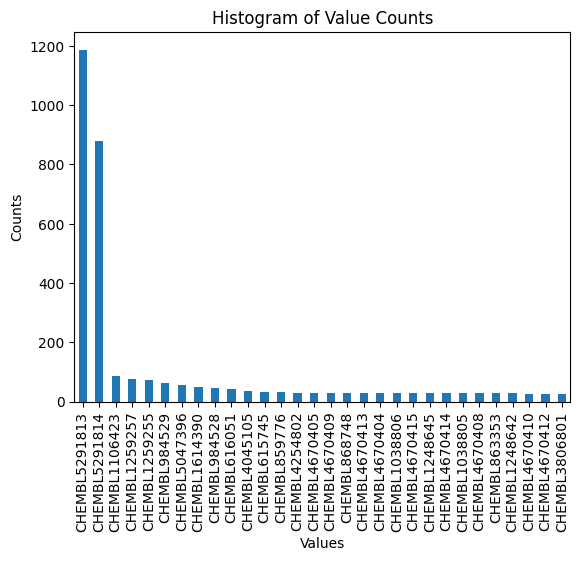

In [ ]:
unique_assays(df)

# Important functions we will reuse


## Drop Nan Values

In [ ]:
# Clean up dataset by dropping NaN values
def clean_nan(df):
  # Original number of rows
  original_row_count = df.shape[0]

  # Convert to numeric and create a new dataset, dropping NaN values
  cleaned_df = df[pd.to_numeric(df['pChEMBL Value'], errors='coerce').notna()].copy()
  cleaned_df['pChEMBL Value'] = pd.to_numeric(cleaned_df['pChEMBL Value'])

  # Number of rows dropped
  dropped_row_count = original_row_count - cleaned_df.shape[0]

  # Print the number of rows dropped and the total number
  print(f"Number of rows dropped: {dropped_row_count} out of {original_row_count}")

  return cleaned_df

## Display distribution of pChEMBL Values with a histogram

In [ ]:
# Display distribution of pChEMBL Values with a histogram
def pChEMBL_hist(df, title):
  # Create the histogram
  plt.figure(figsize=(10, 6))
  plt.hist(df['pChEMBL Value'], bins=30, color='blue', alpha=0.7, edgecolor='black')

  # Add labels and title
  plt.xlabel('pChEMBL Value')
  plt.ylabel('Frequency')
  plt.title(title)

  # Round x-axis ticks
  if not df['pChEMBL Value'].empty:
      x_ticks = np.round(np.linspace(start=df['pChEMBL Value'].min(),
                                      stop=df['pChEMBL Value'].max(),
                                      num=10))
      plt.xticks(x_ticks)

  # Show the plot
  plt.grid(axis='y', alpha=0.75)
  plt.show()

## Create a DataFrame that contains only the rows corresponding to the top 10 Assay ChEMBL ID values by count for IC50/Ec50/...

In [ ]:
def get_top10(df):
  top_10_value_counts = df['Assay ChEMBL ID'].value_counts().head(10)

  # Sum the counts
  total_sum = np.sum(top_10_value_counts)

  # Filter the original DataFrame to only include rows with the top 10 'Assay ChEMBL ID'
  df_top_10 = df[df['Assay ChEMBL ID'].isin(top_10_value_counts.index)]

  # Print the top 10 value counts and the total sum
  print(top_10_value_counts)
  print(f"Total Sum: {total_sum}")

  # Display the new filtered DataFrame
  df_top_10.head()  # Display the first few rows of the filtered DataFrame
  return df_top_10

## Filter duplicates out, keeping the ones with the highest pChEMBL Value

In [ ]:
# Sort the DataFrame by 'Canonical_SMILES' and 'pChEMBL Value' (highest value first)
 # Clean up dataset by dropping duplicate values
def clean_duplicates(df):

  # Sort the DataFrame by 'Canonical_SMILES' and 'pChEMBL Value' (highest value first)
  df_sorted = df.sort_values(by=['Canonical_SMILES', 'pChEMBL Value'], ascending=[True, False])

  # Drop duplicates, keeping the first occurrence (which will have the highest 'pChEMBL Value' after sorting)
  df_no_duplicates = df_sorted.drop_duplicates(subset=['Canonical_SMILES'], keep='first')

  # Find the kicked-out rows
  kicked_out_rows = df_sorted[~df_sorted.index.isin(df_no_duplicates.index)]

  # Display the kicked-out rows
  print("Kicked-out rows:")
  print(kicked_out_rows.head())

  # Display the resulting DataFrame with duplicates removed, keeping the highest 'pChEMBL Value'
  print("\nFiltered DataFrame (duplicates removed):")
  print(df_no_duplicates.head())

  return df_no_duplicates

# Analysis of different Standard Type:


In [ ]:
def analyze_standard_types(df, standard_types):
    results = {}

    for standard_type in standard_types:
        # Filter the DataFrame to only include rows with the specified Standard Type
        df_filtered = df[df['Standard Type'] == standard_type]

        # Print a notification message
        print("""

        ========================================================

        """)
        print(f"PROCESSING FOR {standard_type}...")

        if df_filtered.empty:
            print(f"SKIPPING {standard_type}: NO DATA AVAILABLE.")
            continue

        print(f"We are about to print the number of compounds with {standard_type} values.")
        print("Number of compounds:", df_filtered.shape[0])

        # Plot a histogram of the unique assays
        print(f"We are about to plot a histogram of the unique {standard_type} assays.")
        unique_assays(df_filtered)

        # Print a notification before removing NaN values
        print("We are about to remove rows with NaN values in pChEMBL Value.")
        df_cleaned = clean_nan(df_filtered)

        # Plot the distribution of pChEMBL values before filtering
        print(f"We are about to plot the distribution of pChEMBL Values for {standard_type} before filtering.")
        pChEMBL_hist(df_cleaned, f'Distribution of pChEMBL Values for {standard_type} before filtering')

        # Create a DataFrame containing only the rows for the top 10 Assay ChEMBL ID values by count
        print(f"We are about to get the top 10 Assay ChEMBL ID values by count for {standard_type}.")
        df_top_10 = get_top10(df_cleaned)

        # Print the shape of the filtered DataFrame
        print(f"We are about to print the shape of the top 10 {standard_type} data.")
        print("Shape of top 10 data:", df_top_10.shape)

        # Filter duplicates out, keeping the ones with the highest pChEMBL Value
        print("We are about to filter duplicates, keeping those with the highest pChEMBL Value.")
        df_no_duplicates = clean_duplicates(df_top_10)

        # Print the shape after filtering duplicates
        print(f"We are about to print the shape of the data after filtering duplicates for {standard_type}.")
        print("Shape after filtering duplicates:", df_no_duplicates.shape)

        # Plot the distribution of pChEMBL values after filtering
        print(f"We are about to plot the distribution of pChEMBL Values after filtering for {standard_type}.")
        pChEMBL_hist(df_no_duplicates, f'Distribution of pChEMBL Values after filtering ("None" values dropped) for {standard_type}')

        # Store the final filtered DataFrame in results
        results[standard_type] = df_no_duplicates

    return results




        
PROCESSING FOR IC50...
We are about to print the number of compounds with IC50 values.
Number of compounds: 210
We are about to plot a histogram of the unique IC50 assays.
We are about to remove rows with NaN values in pChEMBL Value.
Number of rows dropped: 49 out of 210
We are about to plot the distribution of pChEMBL Values for IC50 before filtering.


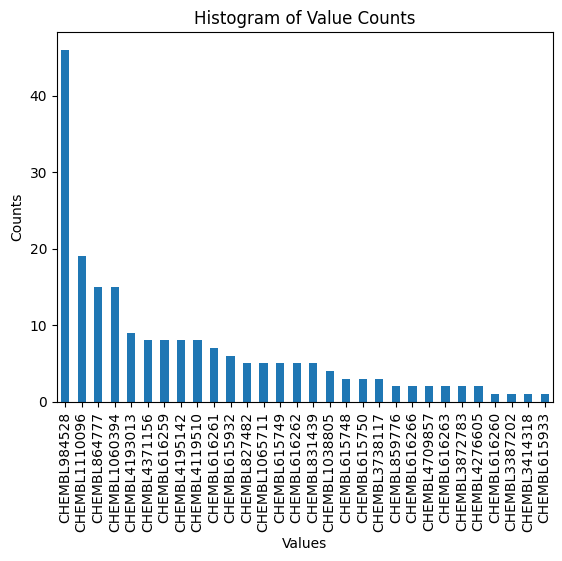

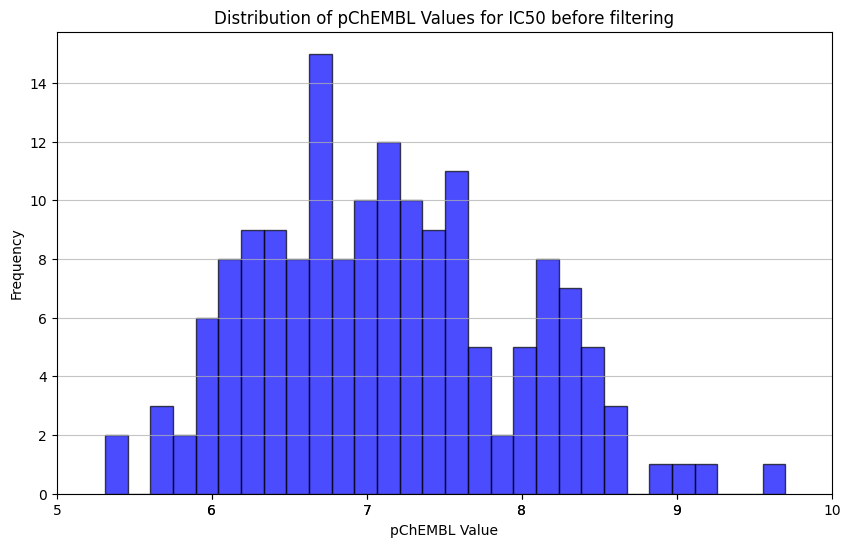

We are about to get the top 10 Assay ChEMBL ID values by count for IC50.
Assay ChEMBL ID
CHEMBL984528     30
CHEMBL1110096    19
CHEMBL1060394    15
CHEMBL864777     14
CHEMBL4371156     8
CHEMBL4195142     8
CHEMBL4119510     8
CHEMBL616261      7
CHEMBL615932      6
CHEMBL827482      5
Name: count, dtype: int64
Total Sum: 120
We are about to print the shape of the top 10 IC50 data.
Shape of top 10 data: (120, 19)
We are about to filter duplicates, keeping those with the highest pChEMBL Value.
Kicked-out rows:
     Molecule ChEMBL ID AlogP Compound Key  \
2204       CHEMBL211363  5.11  (R)-(-)-35a   
8774         CHEMBL8618  2.89      NAN-190   
2116       CHEMBL537403  3.83   WAY-100635   
5049       CHEMBL537403  3.83   WAY-100635   
4426       CHEMBL485228  4.07      (-)-52a   

                                                 Smiles Standard Type  \
2204  COc1cccc2c1C[C@@H](N(CCCc1c[nH]c3ccc(F)cc13)C1...          IC50   
8774        COc1ccccc1N1CCN(CCCCN2C(=O)c3ccccc3C2=O)CC1     

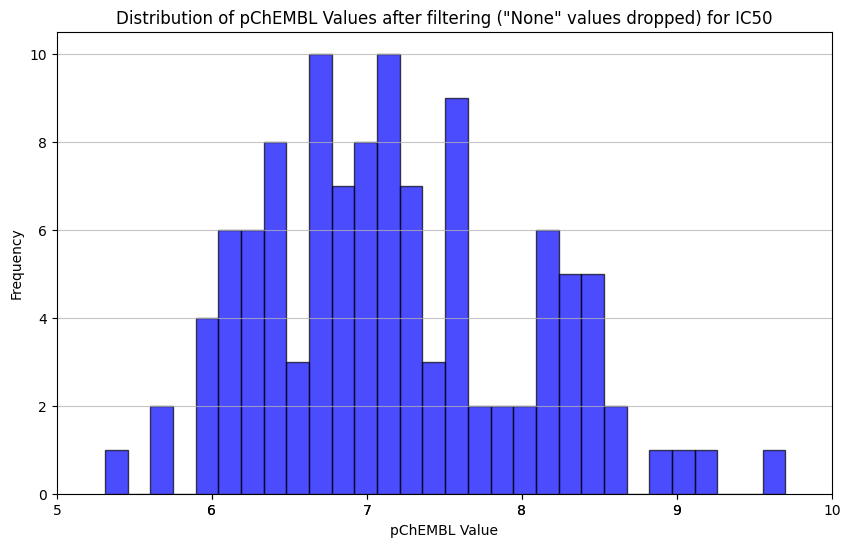




        
PROCESSING FOR EC50...
We are about to print the number of compounds with EC50 values.
Number of compounds: 857
We are about to plot a histogram of the unique EC50 assays.
We are about to remove rows with NaN values in pChEMBL Value.
Number of rows dropped: 185 out of 857
We are about to plot the distribution of pChEMBL Values for EC50 before filtering.


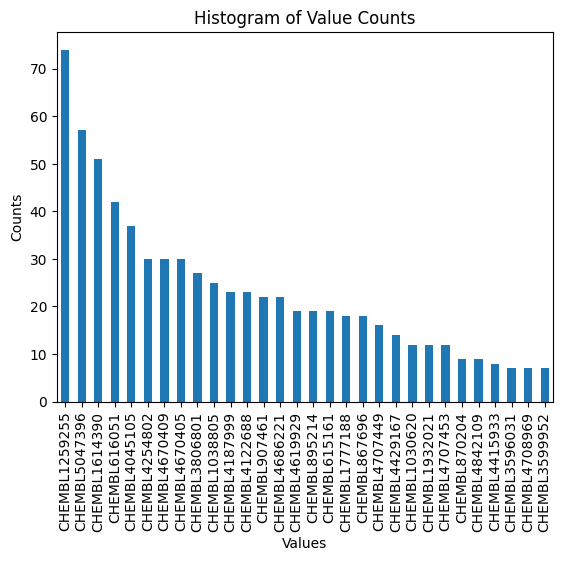

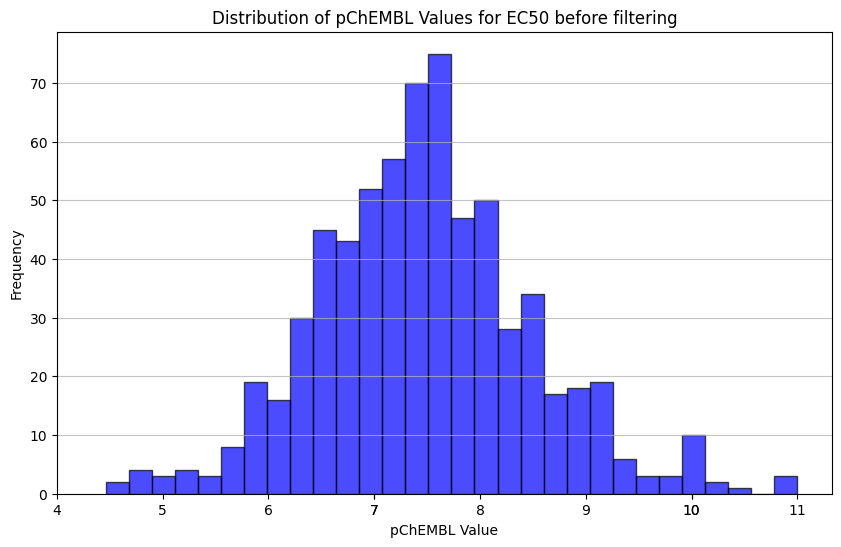

We are about to get the top 10 Assay ChEMBL ID values by count for EC50.
Assay ChEMBL ID
CHEMBL5047396    45
CHEMBL616051     42
CHEMBL1259255    41
CHEMBL4670405    30
CHEMBL4670409    30
CHEMBL4254802    27
CHEMBL4045105    26
CHEMBL3806801    25
CHEMBL1038805    20
CHEMBL895214     19
Name: count, dtype: int64
Total Sum: 305
We are about to print the shape of the top 10 EC50 data.
Shape of top 10 data: (305, 19)
We are about to filter duplicates, keeping those with the highest pChEMBL Value.
Kicked-out rows:
      Molecule ChEMBL ID AlogP    Compound Key  \
2366       CHEMBL4752177  4.56              48   
9749       CHEMBL4755058  4.05              47   
11602      CHEMBL4790600  4.81              55   
2963            CHEMBL56  3.37  (+/-)8-OH-DPAT   
2948            CHEMBL56  3.37  (+/-)8-OH-DPAT   

                                                  Smiles Standard Type  \
2366   CC(=O)Nc1cccc(OCCNCC2(F)CCN(C(=O)c3ccc(Cl)c(Cl...          EC50   
9749   CC(=O)Nc1cccc(OCCNCC2(F)CCN

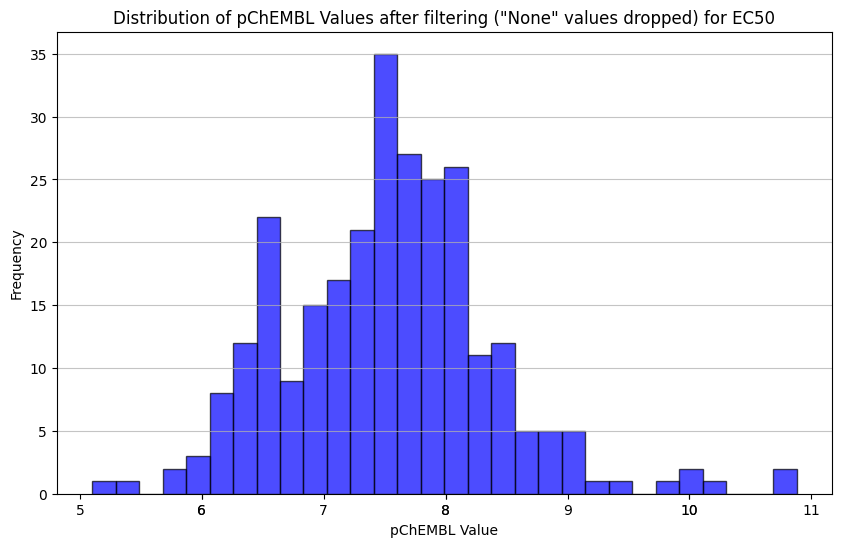




        
PROCESSING FOR pIC50...
SKIPPING pIC50: NO DATA AVAILABLE.



        
PROCESSING FOR pEC50...
We are about to print the number of compounds with pEC50 values.
Number of compounds: 5
We are about to plot a histogram of the unique pEC50 assays.
We are about to remove rows with NaN values in pChEMBL Value.
Number of rows dropped: 5 out of 5
We are about to plot the distribution of pChEMBL Values for pEC50 before filtering.


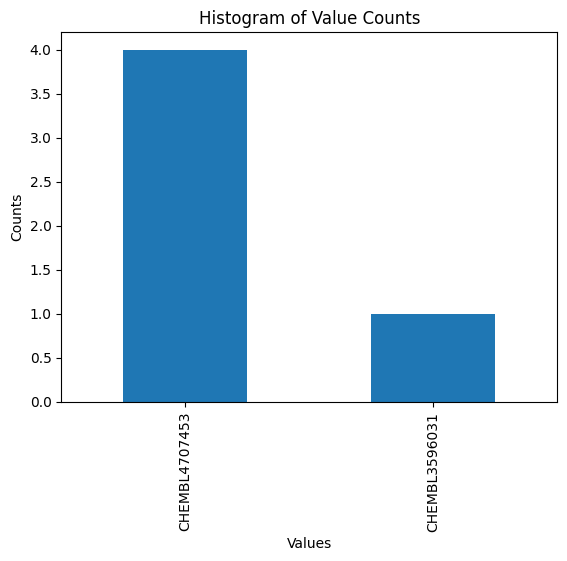

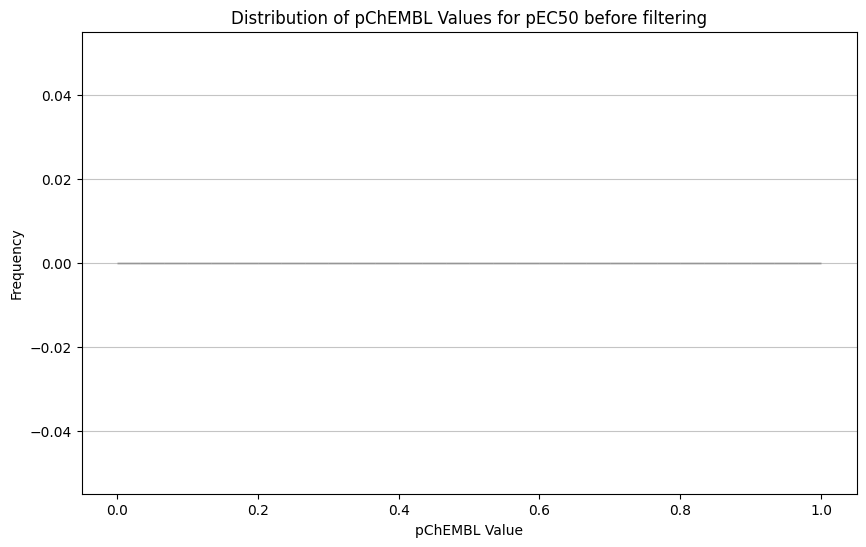

We are about to get the top 10 Assay ChEMBL ID values by count for pEC50.
Series([], Name: count, dtype: int64)
Total Sum: 0
We are about to print the shape of the top 10 pEC50 data.
Shape of top 10 data: (0, 19)
We are about to filter duplicates, keeping those with the highest pChEMBL Value.
Kicked-out rows:
Empty DataFrame
Columns: [Molecule ChEMBL ID, AlogP, Compound Key, Smiles, Standard Type, Standard Relation, Standard Value, Standard Units, pChEMBL Value, Assay ChEMBL ID, Assay Description, BAO Format ID, BAO Label, Assay Tissue ChEMBL ID, Assay Type, Assay Tissue Name, Assay Cell Type, Canonical_SMILES, Target Organism]
Index: []

Filtered DataFrame (duplicates removed):
Empty DataFrame
Columns: [Molecule ChEMBL ID, AlogP, Compound Key, Smiles, Standard Type, Standard Relation, Standard Value, Standard Units, pChEMBL Value, Assay ChEMBL ID, Assay Description, BAO Format ID, BAO Label, Assay Tissue ChEMBL ID, Assay Type, Assay Tissue Name, Assay Cell Type, Canonical_SMILES, Targ

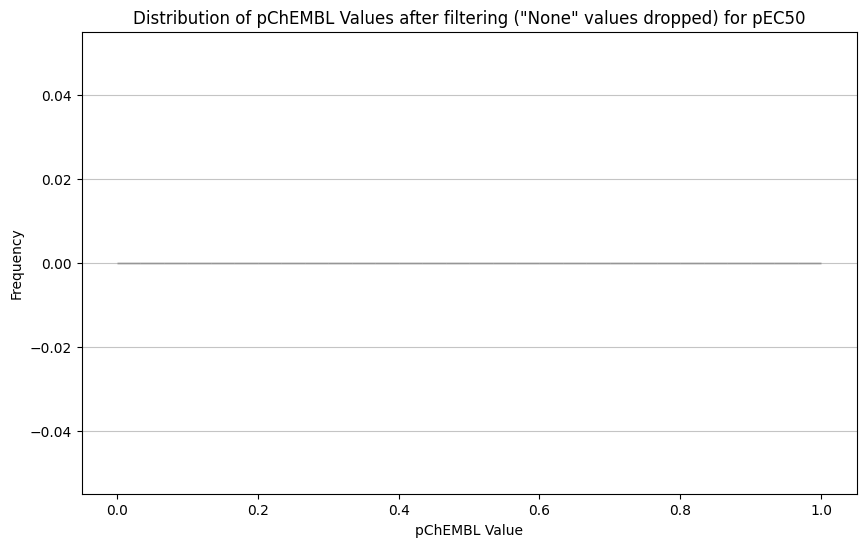

In [ ]:
standard_types = ['IC50', 'EC50', 'pIC50', 'pEC50']

# Run the function
results = analyze_standard_types(df, standard_types)

In [ ]:
for standard_type, result_df in results.items():
    print("""
    =======================================
    """)
    print(f"PROCESSED DATA FOR {standard_type}:")
    print("""
    """)
    print(result_df.head())  # Display the first few rows of each result


    
PROCESSED DATA FOR IC50:

    
     Molecule ChEMBL ID AlogP Compound Key  \
1281       CHEMBL421027  4.82           26   
677        CHEMBL104144  4.11           20   
1270       CHEMBL318604  4.88           28   
5286       CHEMBL104229  4.21           27   
4796       CHEMBL442391  4.28           29   

                                                Smiles Standard Type  \
1281  C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3[nH]ccc23)C1          IC50   
677     C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3c2OCCO3)C1          IC50   
1270    C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3ncccc23)C1          IC50   
5286  C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3[nH]ccc23)C1          IC50   
4796    C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3ncccc23)C1          IC50   

     Standard Relation  Standard Value Standard Units  pChEMBL Value  \
1281               '='            33.0             nM           7.48   
677                '='           115.0             nM           6.94   
1270               '='           686.

# Working with new dataframes

### Concatenate the two dataframes

In [ ]:
# Concatenate all DataFrames from the results dictionary along rows (axis=0)
df_concatenated = pd.concat(results.values(), axis=0)

# Display the concatenated DataFrame
df_concatenated.head()  # Show the first few rows of the concatenated DataFrame

,Molecule ChEMBL ID,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Assay ChEMBL ID,Assay Description,BAO Format ID,BAO Label,Assay Tissue ChEMBL ID,Assay Type,Assay Tissue Name,Assay Cell Type,Canonical_SMILES,Target Organism
1281,CHEMBL421027,4.82,26,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3[nH]ccc23)C1,IC50,'=',33.0,nM,7.48,CHEMBL616261,Antagonism of 5-hydroxytryptamine 1A receptor ...,BAO_0000019,assay format,None,F,None,None,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3[nH]ccc23)C1,Homo sapiens
677,CHEMBL104144,4.11,20,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3c2OCCO3)C1,IC50,'=',115.0,nM,6.94,CHEMBL616261,Antagonism of 5-hydroxytryptamine 1A receptor ...,BAO_0000019,assay format,None,F,None,None,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3c2OCCO3)C1,Homo sapiens
1270,CHEMBL318604,4.88,28,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3ncccc23)C1,IC50,'=',686.0,nM,6.16,CHEMBL616261,Antagonism of 5-hydroxytryptamine 1A receptor ...,BAO_0000019,assay format,None,F,None,None,C1=C(c2c[nH]c3ccccc23)CCN(CCOc2cccc3ncccc23)C1,Homo sapiens
5286,CHEMBL104229,4.21,27,C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3[nH]ccc23)C1,IC50,'=',12.0,nM,7.92,CHEMBL616261,Antagonism of 5-hydroxytryptamine 1A receptor ...,BAO_0000019,assay format,None,F,None,None,C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3[nH]ccc23)C1,Homo sapiens
4796,CHEMBL442391,4.28,29,C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3ncccc23)C1,IC50,'=',90.0,nM,7.05,CHEMBL616261,Antagonism of 5-hydroxytryptamine 1A receptor ...,BAO_0000019,assay format,None,F,None,None,C1=C(c2c[nH]c3ncccc23)CCN(CCOc2cccc3ncccc23)C1,Homo sapiens


In [ ]:
df_concatenated.shape

(382, 19)

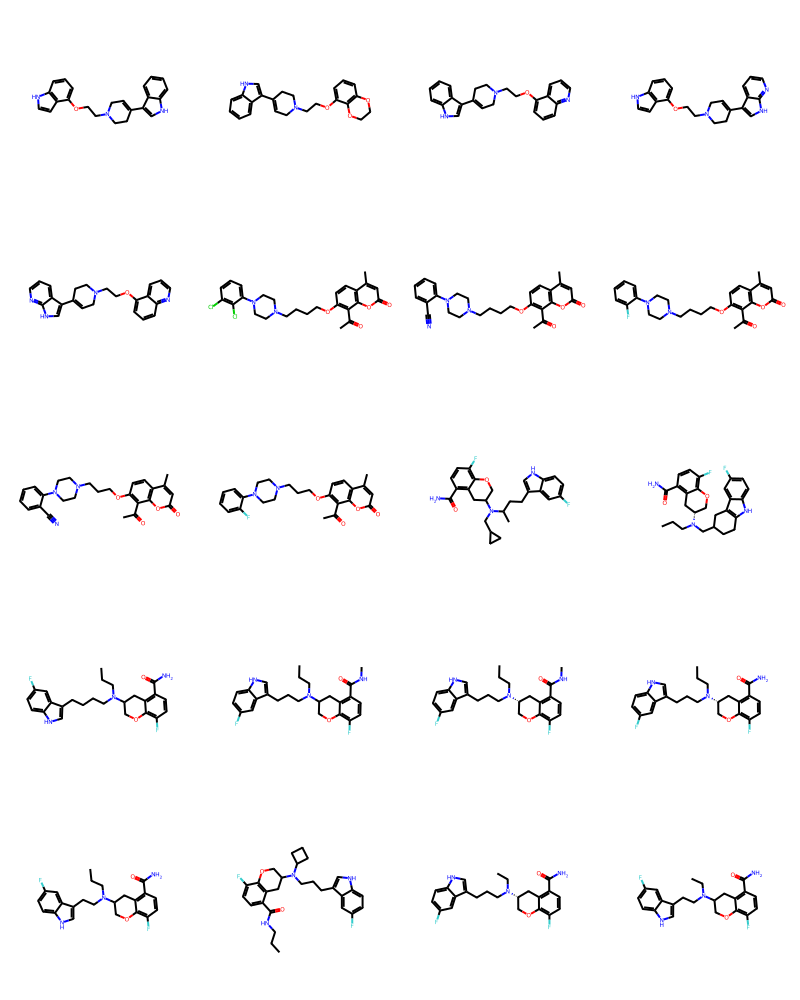

In [ ]:
unique_mols = [Chem.MolFromSmiles(smiles) for smiles in df_concatenated['Canonical_SMILES'].head(20)]
Draw.MolsToGridImage(unique_mols, molsPerRow=4)

### Exctract the IDs of all Assays we are using in the concatenated dataframe and print their description

In [ ]:
# Extract all unique values from the 'Assay ChEMBL ID' column
unique_assay_chembl_ids = df_concatenated['Assay ChEMBL ID'].unique()

# Convert the array of unique values into a list
unique_assay_chembl_ids_list = unique_assay_chembl_ids.tolist()

# Print the list of unique Assay ChEMBL IDs
print(unique_assay_chembl_ids_list)

['CHEMBL616261', 'CHEMBL4119510', 'CHEMBL984528', 'CHEMBL864777', 'CHEMBL1110096', 'CHEMBL615932', 'CHEMBL4195142', 'CHEMBL827482', 'CHEMBL1060394', 'CHEMBL4371156', 'CHEMBL5047396', 'CHEMBL895214', 'CHEMBL4670405', 'CHEMBL4254802', 'CHEMBL1038805', 'CHEMBL3806801', 'CHEMBL616051', 'CHEMBL1259255', 'CHEMBL4045105', 'CHEMBL4670409']


In [ ]:
# Write your SQL query
query = f"SELECT * FROM '{assays_name}'"

# Use pandas to read the SQL query into a DataFrame
df = pd.read_sql(query, conn)

# Print the column names of the DataFrame
print(df.columns)

# Display the first few rows of the table
df.head()

Index(['ChEMBL ID', 'Assay Type', 'Description', 'Organism', 'Compounds',
       'Activities', 'BAO Format ID', 'BAO Format', 'Confidence Score',
       'Confidence Label', 'Strain', 'Source', 'Tax ID', 'Tissue ChEMBL ID',
       'Tissue Name', 'Cell Type', 'Subcellular Fraction',
       'Document ChEMBL ID', 'PubMed ID', 'DOI', 'Year', 'Journal', 'Volume',
       'First Page', 'Last Page', 'Assay Parameters',
       'Assay Classification L1', 'Assay Classification L2',
       'Assay Classification L3', 'Variant Sequence Accession',
       'Variant Sequence Mutation'],
      dtype='object')


,ChEMBL ID,Assay Type,Description,Organism,Compounds,Activities,BAO Format ID,BAO Format,Confidence Score,Confidence Label,...,Journal,Volume,First Page,Last Page,Assay Parameters,Assay Classification L1,Assay Classification L2,Assay Classification L3,Variant Sequence Accession,Variant Sequence Mutation
0,CHEMBL615778,B,Binding affinity was measured on 5-hydroxytryp...,None,3,3,BAO_0000219,cell-based format,8,8 - Homologous single protein target assigned,...,J Med Chem,37,2828,2830,None,None,None,None,None,None
1,CHEMBL616134,B,Tested in vitro for its ability to bind to 5-h...,None,8,8,BAO_0000357,single protein format,8,8 - Homologous single protein target assigned,...,J Med Chem,46,3526,3535,None,None,None,None,None,None
2,CHEMBL1055781,B,Inhibition of 5HT1A receptor at 10 uM,None,1,1,BAO_0000357,single protein format,8,8 - Homologous single protein target assigned,...,J Med Chem,52,5330,5343,None,None,None,None,None,None
3,CHEMBL1227760,B,Displacement of [3H]8OH-DPAT from human 5HT1A ...,Homo sapiens,10,10,BAO_0000357,single protein format,9,9 - Direct single protein target assigned,...,Bioorg Med Chem Lett,20,5199,5202,None,None,None,None,None,None
4,CHEMBL615991,F,Agonistic effect against 5-hydroxytryptamine 1...,None,5,5,BAO_0000219,cell-based format,8,8 - Homologous single protein target assigned,...,J Med Chem,47,3823,3842,None,None,None,None,None,None


In [ ]:
# Loop through the unique Assay ChEMBL IDs and print the corresponding Description
def get_description(list):
  for assay_id in list:
      # Filter the DataFrame to get the description for the current Assay ChEMBL ID
      description = df[df['ChEMBL ID'] == assay_id]['Description'].unique()

      # Print the Assay ChEMBL ID and its description
      print(f"Assay ChEMBL ID: {assay_id}")
      print(f"Description: {description}\n")

In [ ]:
get_description(unique_assay_chembl_ids_list)

Assay ChEMBL ID: CHEMBL616261
Description: ['Antagonism of 5-hydroxytryptamine 1A receptor determined in vitro']

Assay ChEMBL ID: CHEMBL4119510
Description: ['Antagonist activity at human 5-HT1A receptor expressed in CHO-K1 cells assessed as inhibition of serotonin-induced calcium mobilization preincubated for 25 mins followed by serotonin induction measured for 30 secs by aequorin-derived luminescence assay']

Assay ChEMBL ID: CHEMBL984528
Description: ['Activity at human cloned 5HT1A receptor expressed in CHO cells assessed as blockade of 5-HT-stimulated [35S]GTPgammaS binding']

Assay ChEMBL ID: CHEMBL864777
Description: ['Agonist activity at human 5HT1A receptor expressed in CHO cells by inhibition of 8-OH-DPAT-induced decrease in forskolin-stimulated cAMP production']

Assay ChEMBL ID: CHEMBL1110096
Description: ['Antagonist activity at human 5HT1A receptor expressed in CHO cells assessed as blockade of 8-OH-DPAT-induced inhibition of forskolin-stimulated increase in cAMP level']

### pChEMBL Value Box Plot

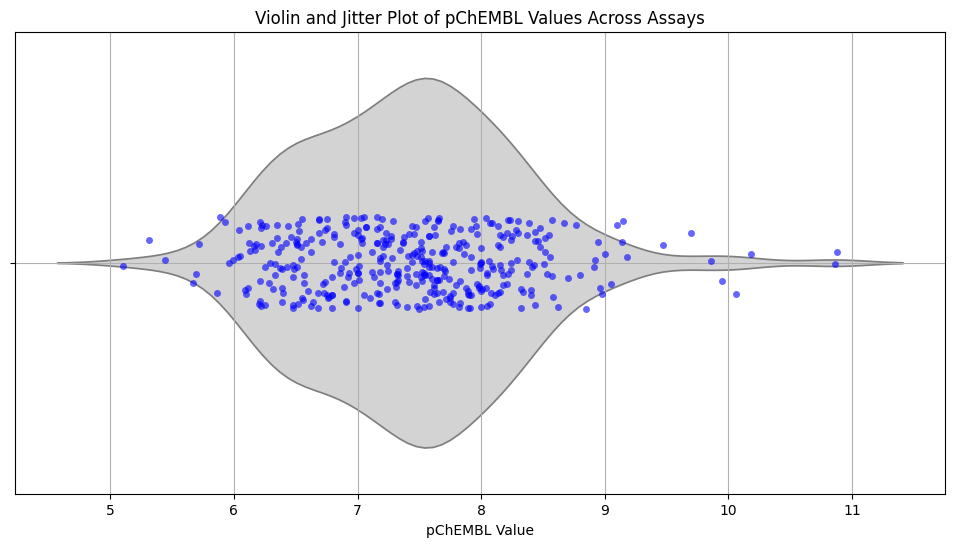

In [ ]:
import seaborn as sns
df_concatenated.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_concatenated['pChEMBL Value'], errors='coerce')
df_concatenated_bp = df_concatenated.dropna(subset=['pChEMBL Value'])

plt.figure(figsize=(12, 6))
sns.violinplot(x=df_concatenated_bp['pChEMBL Value'], inner=None, color="lightgray")
sns.stripplot(x=df_concatenated_bp['pChEMBL Value'], color='blue', alpha=0.6, jitter=True)
plt.title('Violin and Jitter Plot of pChEMBL Values Across Assays')
plt.xlabel('pChEMBL Value')
plt.grid(True)
plt.show()

### Distribution, Outlier Detection, and Key Value Identification (lowest/highest)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def detect_and_plot_outliers(df_concatenated, standard_types, z_threshold=3):
    results = {}

    for standard_type in standard_types:
        print("""

        ========================================================

        """)
        print(f"PROCESSING FOR {standard_type}...")
        # Filter the DataFrame for the specified Standard Type
        df_filtered = df_concatenated[df_concatenated['Standard Type'] == standard_type]

        if df_filtered.empty:
            print(f"SKIPPING {standard_type}: NO DATA AVAILABLE")
            continue

        # Ensure pChEMBL Value is numeric and remove rows with NaN in pChEMBL Value
        df_filtered.loc[:, 'pChEMBL Value'] = pd.to_numeric(df_filtered['pChEMBL Value'], errors='coerce')
        df_filtered = df_filtered.dropna(subset=['pChEMBL Value'])

        # IQR Outlier Detection
        Q1 = df_filtered['pChEMBL Value'].quantile(0.25)
        Q3 = df_filtered['pChEMBL Value'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_iqr = df_filtered[(df_filtered['pChEMBL Value'] < lower_bound) | (df_filtered['pChEMBL Value'] > upper_bound)]

        print(f"{standard_type} - Outliers identified using IQR:")
        print(outliers_iqr)

        # Box plot for IQR Outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(df_filtered['pChEMBL Value'], vert=False)
        plt.title(f'{standard_type} pChEMBL Value Distribution and Outliers (IQR)')
        plt.xlabel('pChEMBL Value')
        plt.grid(True)
        plt.show()

        # Violin and Jitter plot
        plt.figure(figsize=(12, 6))
        sns.violinplot(x=df_filtered['pChEMBL Value'], inner=None, color="lightgray")
        sns.stripplot(x=df_filtered['pChEMBL Value'], color='blue', alpha=0.6, jitter=True)
        plt.title(f'Violin and Jitter Plot of {standard_type} pChEMBL Values')
        plt.xlabel('pChEMBL Value')
        plt.grid(True)
        plt.show()

        # Highest and lowest values
        df_sorted = df_filtered.sort_values(by='pChEMBL Value', ascending=False)
        print(f"Top 5 {standard_type} pChEMBL Values:")
        print(df_sorted['pChEMBL Value'].head(5))
        print(f"\nBottom 5 {standard_type} pChEMBL Values:")
        print(df_sorted['pChEMBL Value'].tail(5))

        # Z-Score Outlier Detection
        df_filtered['z_score'] = zscore(df_filtered['pChEMBL Value'])
        outliers_z = df_filtered[(df_filtered['z_score'] > z_threshold) | (df_filtered['z_score'] < -z_threshold)]

        print(f"{standard_type} - Outliers identified using Z-score (|Z| > {z_threshold}):")
        print(outliers_z[['pChEMBL Value', 'z_score']])

        # Box plot for Z-score Outliers
        plt.figure(figsize=(10, 6))
        plt.boxplot(df_filtered['pChEMBL Value'], vert=False)
        plt.title(f'{standard_type} pChEMBL Value Distribution with Z-Score Outlier Detection')
        plt.xlabel('pChEMBL Value')
        plt.grid(True)
        plt.show()

        # Store results in a dictionary for access later
        results[standard_type] = {
            'df_filtered': df_filtered,
            'outliers_iqr': outliers_iqr,
            'outliers_z': outliers_z,
            'top_5': df_sorted.head(5),
            'bottom_5': df_sorted.tail(5)
        }

    return results





        
PROCESSING FOR IC50...
IC50 - Outliers identified using IQR:
     Molecule ChEMBL ID AlogP Compound Key  \
8256       CHEMBL439849  4.03          551   

                                                 Smiles Standard Type  \
8256  N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc5oc(C(N)=O)cc5c...          IC50   

     Standard Relation  Standard Value Standard Units  pChEMBL Value  \
8256               '='             0.2             nM            9.7   

     Assay ChEMBL ID                                  Assay Description  \
8256   CHEMBL4371156  Agonist activity at human 5HT1A expressed in C...   

     BAO Format ID          BAO Label Assay Tissue ChEMBL ID Assay Type  \
8256   BAO_0000219  cell-based format                   None          F   

     Assay Tissue Name Assay Cell Type  \
8256              None             CHO   

                                       Canonical_SMILES Target Organism  
8256  N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc5oc(C(N)=O)cc5c...    Homo sapiens  


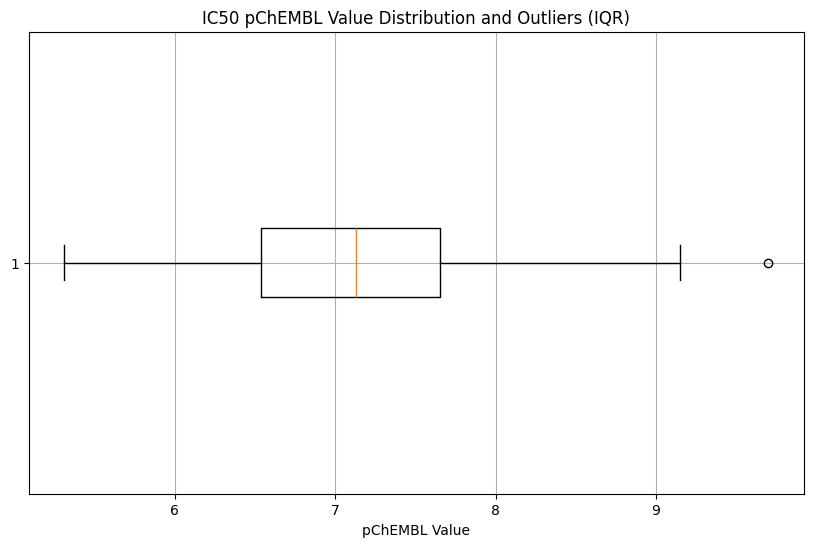

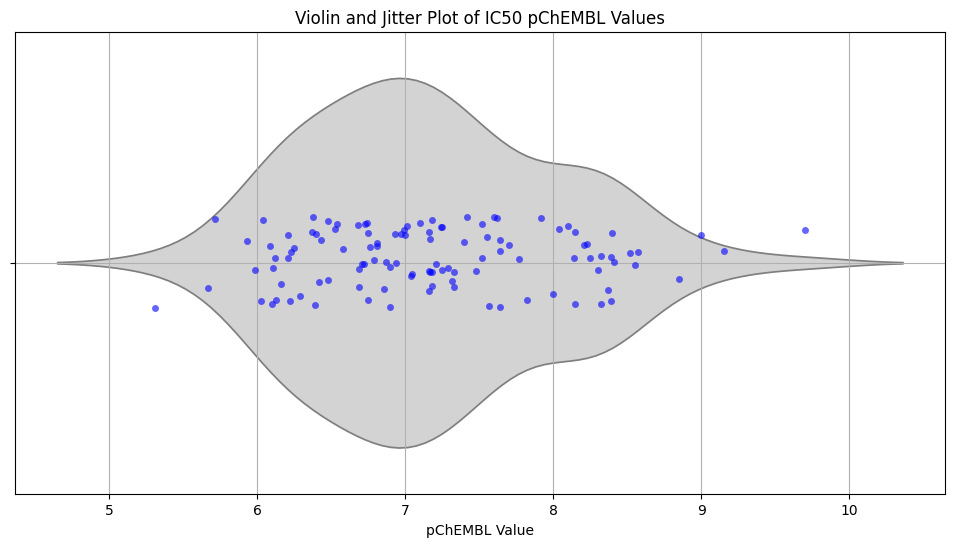

Top 5 IC50 pChEMBL Values:
8256     9.70
244      9.15
10649    9.00
7646     8.85
6569     8.57
Name: pChEMBL Value, dtype: float64

Bottom 5 IC50 pChEMBL Values:
2693     5.99
2432     5.93
4911     5.72
10448    5.67
6178     5.31
Name: pChEMBL Value, dtype: float64
IC50 - Outliers identified using Z-score (|Z| > 3):
Empty DataFrame
Columns: [pChEMBL Value, z_score]
Index: []


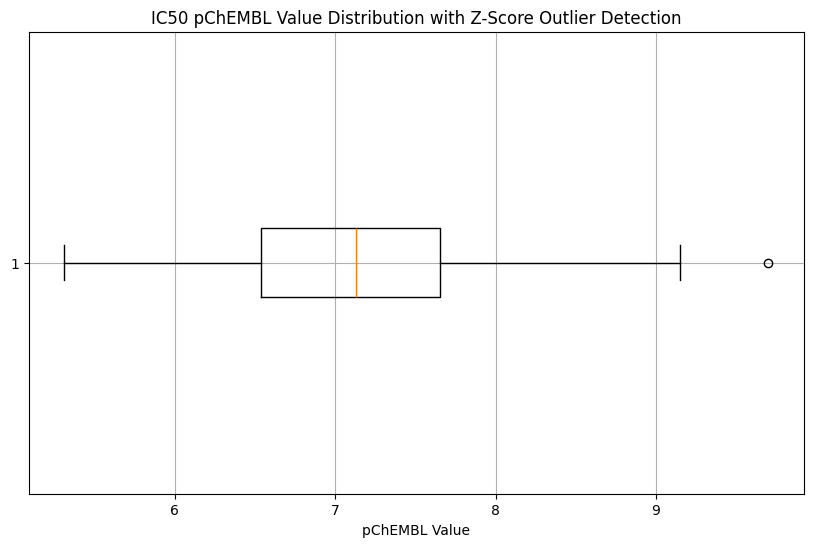




        
PROCESSING FOR EC50...
EC50 - Outliers identified using IQR:
      Molecule ChEMBL ID AlogP Compound Key  \
5726       CHEMBL4752177  4.56           48   
4022       CHEMBL4755058  4.05           47   
8996       CHEMBL4796345  4.13           45   
10706      CHEMBL4751777   4.1           36   
1934        CHEMBL230961  3.31            7   
9890       CHEMBL4756233  4.57           56   
11392      CHEMBL4757755  4.06           57   
5036        CHEMBL231272  3.94           14   

                                                  Smiles Standard Type  \
5726   CC(=O)Nc1cccc(OCCNCC2(F)CCN(C(=O)c3ccc(Cl)c(Cl...          EC50   
4022   CC(=O)Nc1cccc(OCCNCC2(F)CCN(C(=O)c3ccc(F)c(Cl)...          EC50   
8996   CNc1cccc(OCCNCC2(F)CCN(C(=O)c3ccc(F)c(Cl)c3)CC...          EC50   
10706   COc1ccccc1OCCNCC1(F)CCN(C(=O)c2ccc(F)c(Cl)c2)CC1          EC50   
1934     Cc1ccc(CNCC2(F)CCN(C(=O)c3ccc(F)c(Cl)c3)CC2)nn1          EC50   
9890   O=C(c1ccc(F)c(Cl)c1)N1CCC(F)(CNCCOc2cccc3[nH]c...   

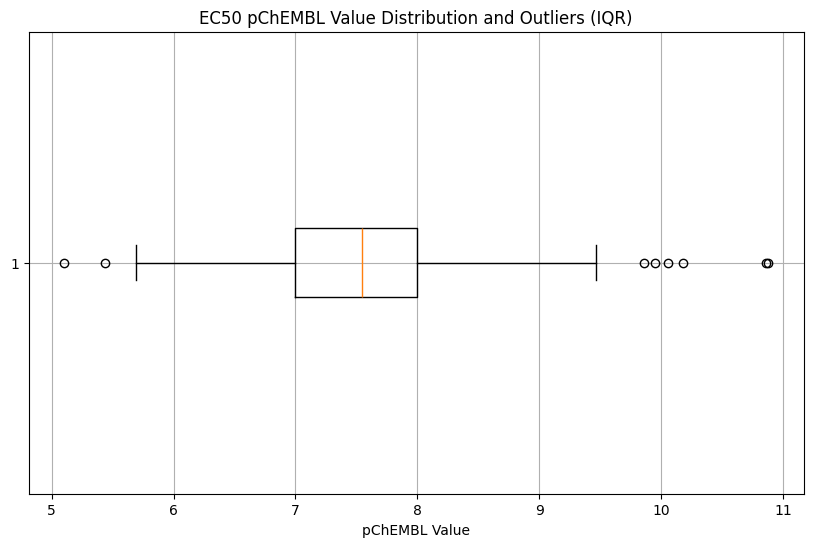

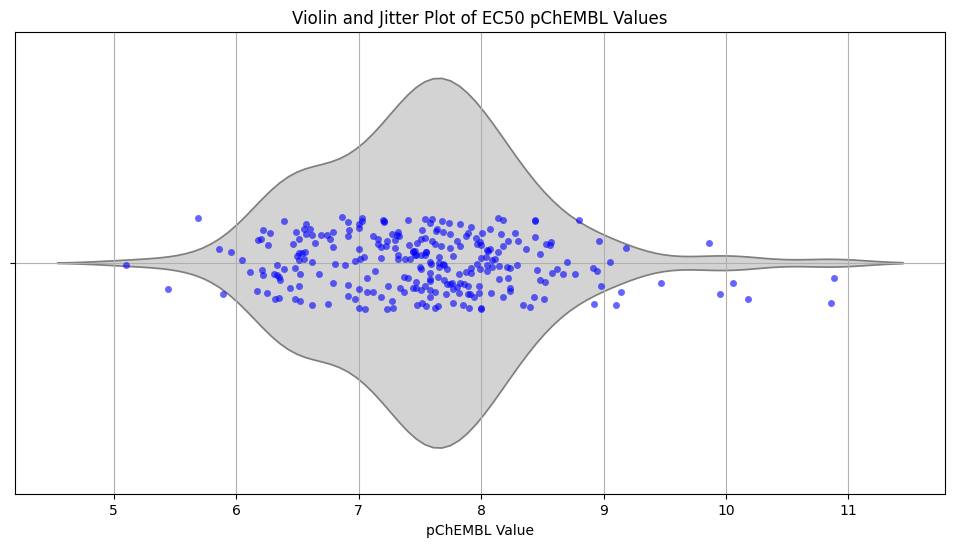

Top 5 EC50 pChEMBL Values:
11392    10.88
4022     10.86
5726     10.18
9890     10.06
8996      9.95
Name: pChEMBL Value, dtype: float64

Bottom 5 EC50 pChEMBL Values:
10850    5.89
10242    5.86
5255     5.69
5036     5.44
1934     5.10
Name: pChEMBL Value, dtype: float64
EC50 - Outliers identified using Z-score (|Z| > 3):
       pChEMBL Value   z_score
5726           10.18  3.078689
4022           10.86  3.869134
11392          10.88  3.892383


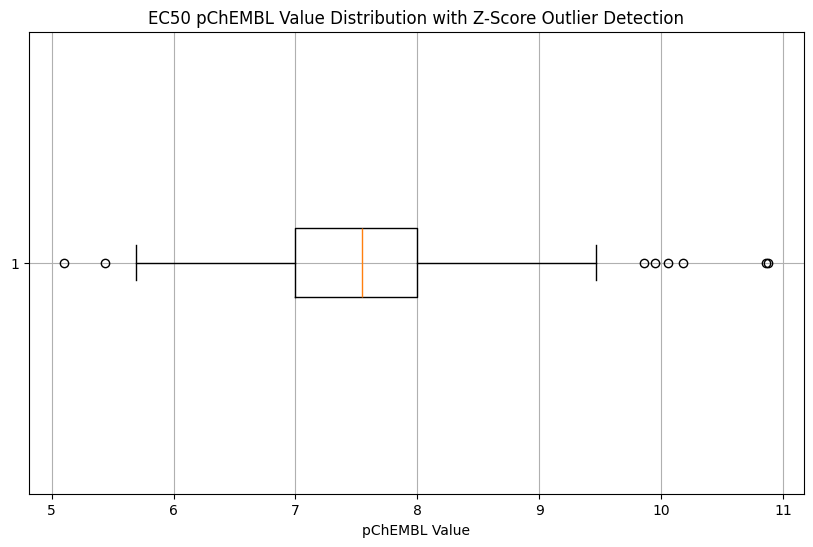




        
PROCESSING FOR pIC50...
SKIPPING pIC50: NO DATA AVAILABLE



        
PROCESSING FOR pEC50...
SKIPPING pEC50: NO DATA AVAILABLE


In [ ]:
df_concatenated = pd.concat(results.values(), axis=0)

# Define standard types to analyze
standard_types = ['IC50', 'EC50', 'pIC50', 'pEC50']

# Run the outlier detection and plotting function
outlier_results = detect_and_plot_outliers(df_concatenated, standard_types)

In [ ]:
for standard_type in outlier_results.keys():
    # Retrieve the cleaned data for each standard type
    data = outlier_results[standard_type]['df_filtered']

    # Convert to DataFrame format
    df_standard = pd.DataFrame(data)

    # Save to variable using exec()
    exec(f"df_{standard_type.lower()}_od = df_standard")
    print(f"Data for {standard_type} saved to df_{standard_type.lower()}_od")

Data for IC50 saved to df_ic50_od
Data for EC50 saved to df_ec50_od


# Training

In [ ]:
from rdkit.Chem import AllChem, Descriptors, rdFingerprintGenerator
from rdkit import Chem, DataStructs
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

In [ ]:
#--- Step 1: ECFP6 Fingerprints and Descriptor Functions ---

def smiles_to_ecfp6(smiles, radius=3, n_bits=2048):
    """Convert SMILES to ECFP6 bit vector (Morgan fingerprint)."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=radius, fpSize=n_bits)
        fp = mfpgen.GetFingerprint(mol)
        array = np.zeros((1,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, array)
        return array
    return [np.nan] * n_bits

def add_ecfp6_column(df, smiles_col='Smiles'):
    """Add ECFP6 fingerprints as a column in DataFrame."""
    df['ECFP6'] = df[smiles_col].apply(lambda x: smiles_to_ecfp6(x))
    return df

def generate_descriptors(df, smiles_column='Smiles'):
    """Generate molecular descriptors (MolWt, LogP, TPSA) for each SMILES."""
    descriptor_list = []
    for smiles in df[smiles_column]:
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                mol_weight = Descriptors.MolWt(mol)
                logP = Descriptors.MolLogP(mol)
                tpsa = Descriptors.TPSA(mol)
                descriptor_list.append([mol_weight, logP, tpsa])
            else:
                descriptor_list.append([np.nan, np.nan, np.nan])
        except:
            descriptor_list.append([np.nan, np.nan, np.nan])
    return descriptor_list

def prepare_ml_inputs(df, descriptor_type='ecfp6'):
    """Prepare feature matrix and target variable for ML."""
    if descriptor_type == 'ecfp6':
        X = np.array(list(df['ECFP6']))
    else:
        X = np.array(generate_descriptors(df))
    y = np.array(df['pChEMBL Value'])
    return X, y

# --- Step 2: Model Training and Evaluation ---

def hyperparameter_optimization(X_train, y_train):
    """Optimize hyperparameters for RandomForestRegressor using RandomizedSearchCV."""
    param_dist = {
        'n_estimators': randint(50, 200),
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    rf = RandomForestRegressor(random_state=42)
    search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5,
                                scoring='r2', random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    return search.best_estimator_

def train_model(X, y, hyperopt=False):
    """Train model with optional hyperparameter optimization."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    if hyperopt:
        model = hyperparameter_optimization(X_train, y_train)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
    return model, X_test, y_test

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and return R², MAE, and RMSE metrics."""
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, mae, rmse

# --- Step 3: Processing Datasets ---

def process_datasets(datasets, mode='both'):
    """
    Process each dataset and train models using both ECFP6 and molecular descriptors,
    with optional hyperparameter optimization.

    Parameters:
    - datasets: Dictionary where keys are dataset names and values are DataFrames.
    - mode: Specify 'without', 'with', or 'both' to control hyperparameter optimization.

    Returns:
    - results: Dictionary containing evaluation metrics (R², MAE, RMSE) for each dataset.
    """
    results = {name: {'ecfp6': {'without': {}, 'with': {}}, 'descriptors': {'without': {}, 'with': {}}} for name in datasets.keys()}

    for dataset_name, df in datasets.items():
        # Add ECFP6 fingerprints and prepare features for both descriptor types
        df = add_ecfp6_column(df)
        X_ecfp6, y_ecfp6 = prepare_ml_inputs(df, descriptor_type='ecfp6')
        X_desc, y_desc = prepare_ml_inputs(df, descriptor_type='descriptors')

        # Training and evaluation for ECFP6 fingerprints
        if mode in ['without', 'both']:
            rf_ecfp6_no_opt, X_test_ecfp6, y_test_ecfp6 = train_model(X_ecfp6, y_ecfp6, hyperopt=False)
            r2, mae, rmse = evaluate_model(rf_ecfp6_no_opt, X_test_ecfp6, y_test_ecfp6)
            results[dataset_name]['ecfp6']['without'] = {'r2': r2, 'mae': mae, 'rmse': rmse}

        if mode in ['with', 'both']:
            rf_ecfp6_opt, X_test_ecfp6, y_test_ecfp6 = train_model(X_ecfp6, y_ecfp6, hyperopt=True)
            r2, mae, rmse = evaluate_model(rf_ecfp6_opt, X_test_ecfp6, y_test_ecfp6)
            results[dataset_name]['ecfp6']['with'] = {'r2': r2, 'mae': mae, 'rmse': rmse}

        # Training and evaluation for molecular descriptors
        if mode in ['without', 'both']:
            rf_desc_no_opt, X_test_desc, y_test_desc = train_model(X_desc, y_desc, hyperopt=False)
            r2, mae, rmse = evaluate_model(rf_desc_no_opt, X_test_desc, y_test_desc)
            results[dataset_name]['descriptors']['without'] = {'r2': r2, 'mae': mae, 'rmse': rmse}

        if mode in ['with', 'both']:
            rf_desc_opt, X_test_desc, y_test_desc = train_model(X_desc, y_desc, hyperopt=True)
            r2, mae, rmse = evaluate_model(rf_desc_opt, X_test_desc, y_test_desc)
            results[dataset_name]['descriptors']['with'] = {'r2': r2, 'mae': mae, 'rmse': rmse}

    return results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_results(results, metrics=['r2', 'mae', 'rmse'], scale_factor=0.5):
    """
    Plot the evaluation metric results for different datasets and optimization types,
    with bars visually shortened by applying a scale factor and displaying values on top.

    Parameters:
    - results: Dictionary containing metric results for each dataset, descriptor type, and optimization mode.
    - metrics: List of metrics to plot ('r2', 'mae', 'rmse').
    - scale_factor: Factor by which to scale the bar heights to make them appear shorter.
    """
    dataset_map = {
        "df_ic50_od": "IC50",
        "df_ec50_od": "EC50",
        "df_pec50_od": "pEC50",
        "df_pic50_od": "pIC50"
    }

    # Iterate over each metric
    for metric in metrics:
        labels = ["ECFP6", "ECFP6, hyper-opt", "Descriptor", "Descriptor, hyper-opt"]
        colors = ['#9ba9ff', '#6076ff','#ffa971', '#ff771e']

        fig, ax = plt.subplots(figsize=(12, 6))
        x = np.arange(len(results))  # Dataset locations
        width = 0.2  # Width of each bar

        # Plot each dataset with four bars: without/with hyperopt for ECFP6 and descriptors
        for i, dataset_name in enumerate(results.keys()):
            label = dataset_map.get(dataset_name, dataset_name)

            # Retrieve the metrics for each configuration
            without_ecfp6 = results[dataset_name]['ecfp6']['without'].get(metric, 0) * scale_factor
            with_ecfp6 = results[dataset_name]['ecfp6']['with'].get(metric, 0) * scale_factor
            without_desc = results[dataset_name]['descriptors']['without'].get(metric, 0) * scale_factor
            with_desc = results[dataset_name]['descriptors']['with'].get(metric, 0) * scale_factor

            # Plot bars
            ax.bar(x[i] - 1.5 * width, without_ecfp6, width, color=colors[0], label=labels[0] if i == 0 else "")
            ax.bar(x[i] - 0.5 * width, with_ecfp6, width, color=colors[1], label=labels[1] if i == 0 else "")
            ax.bar(x[i] + 0.5 * width, without_desc, width, color=colors[2], label=labels[2] if i == 0 else "")
            ax.bar(x[i] + 1.5 * width, with_desc, width, color=colors[3], label=labels[3] if i == 0 else "")

            # Add value labels on top of each bar
            ax.text(x[i] - 1.5 * width, without_ecfp6 + 0.01, f"{results[dataset_name]['ecfp6']['without'].get(metric, 0):.2f}",
                    ha='center', va='bottom', fontsize=10, color='black')
            ax.text(x[i] - 0.5 * width, with_ecfp6 + 0.01, f"{results[dataset_name]['ecfp6']['with'].get(metric, 0):.2f}",
                    ha='center', va='bottom', fontsize=10, color='black')
            ax.text(x[i] + 0.5 * width, without_desc + 0.01, f"{results[dataset_name]['descriptors']['without'].get(metric, 0):.2f}",
                    ha='center', va='bottom', fontsize=10, color='black')
            ax.text(x[i] + 1.5 * width, with_desc + 0.01, f"{results[dataset_name]['descriptors']['with'].get(metric, 0):.2f}",
                    ha='center', va='bottom', fontsize=10, color='black')

        # Customize the plot
        ax.set_xlabel('Datasets')
        ax.set_ylabel(metric.upper())
        ax.set_title(f'{metric.upper()} performance on {assays_name}')
        ax.set_xticks(x)
        ax.set_xticklabels([dataset_map.get(dataset, dataset) for dataset in results.keys()])
        ax.legend(loc="upper right")

        # Show the actual range of values on the y-axis
        max_val = max(
            max(
                results[dataset][desc_type][opt].get(metric, 0)
                for opt in ['without', 'with']
            )
            for dataset in results
            for desc_type in ['ecfp6', 'descriptors']
        )
        ax.set_yticks(np.linspace(0, max_val, 5))
        ax.set_yticklabels([f"{round(val/scale_factor, 2)}" for val in ax.get_yticks()])

        ax.grid(True)
        plt.show()

In [ ]:
datasets = {
    "df_ic50_od": df_ic50_od,
    "df_ec50_od": df_ec50_od
}

pred_results = process_datasets(datasets, mode='both')

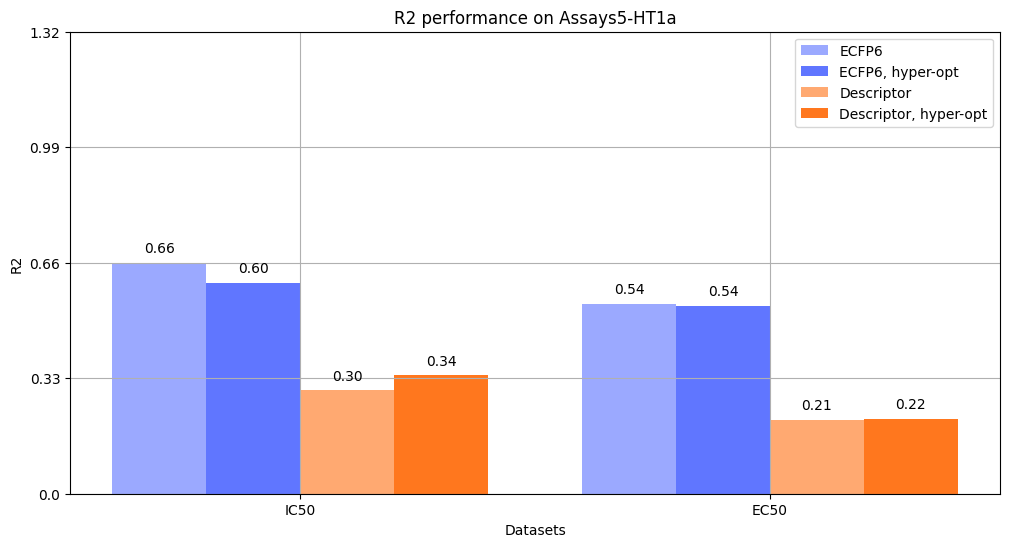

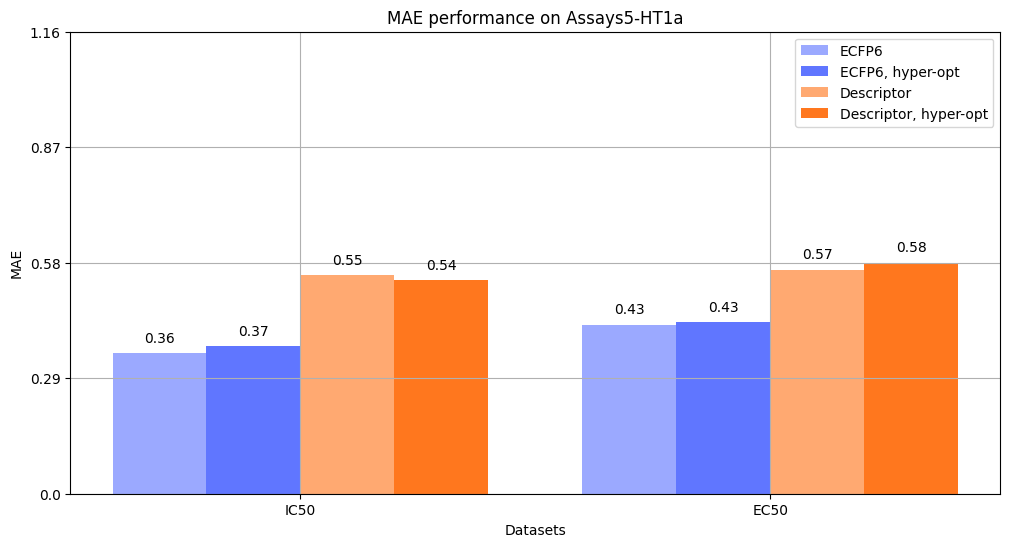

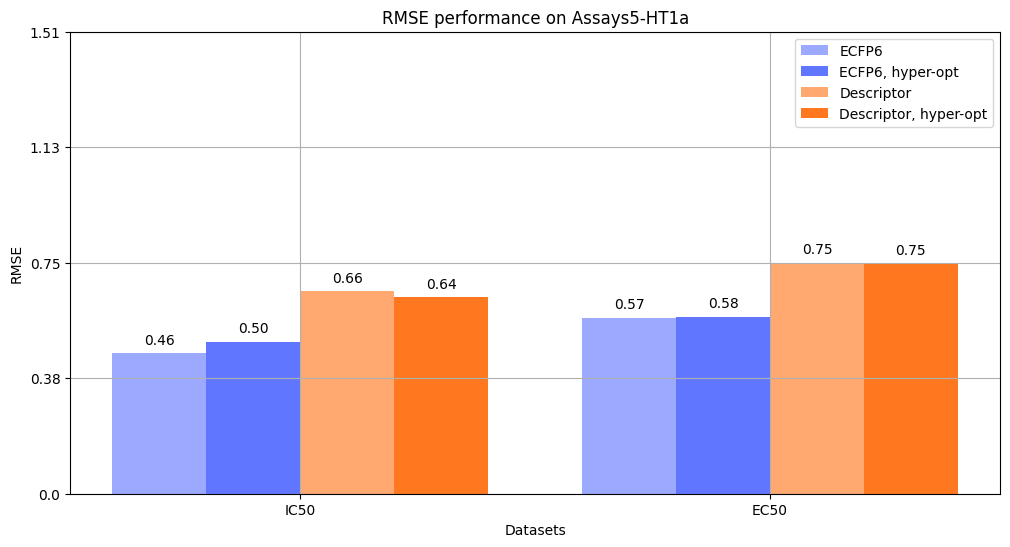

In [ ]:
plot_results(pred_results, scale_factor=0.5)

In [ ]:
datasets = {
    "df_ic50_od": df_ic50_od,
}

#Confidence Intervals

In [ ]:
from scipy.stats import t
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


def train_model_with_results(X, y, molecule_ids, hyperopt=False):
    """
    Train the model and return the model, test set, and evaluation results for test set molecules.

    Parameters:
    - X, y: Features and target variable.
    - molecule_ids: List of molecule identifiers corresponding to X and y.
    - hyperopt: Whether to use hyperparameter optimization.

    Returns:
    - model: Trained model.
    - test_set_results: Dictionary with test set predictions, metrics, and molecule information.
    """
    X_train, X_test, y_train, y_test, mol_train, mol_test = train_test_split(
        X, y, molecule_ids, test_size=0.2, random_state=42
    )

    # Train the model
    if hyperopt:
        model = hyperparameter_optimization(X_train, y_train)
    else:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Save results
    test_set_results = {
        'molecule_ids': mol_test,
        'actual': y_test,
        'predicted': y_pred,
        'metrics': {
            'r2': r2,
            'rmse': rmse
        }
    }

    return model, test_set_results

def calculate_confidence_intervals(actual, predicted, confidence_level=0.95):
    # Calculate residuals
    residuals = actual - predicted

    # Residual sum of squares
    rss = np.sum(residuals**2)

    # Number of observations
    n = len(actual)

    # Degrees of freedom
    df = n - 2  # For linear regression

    # Standard error of the prediction
    standard_error = np.sqrt(rss / df)

    # Critical t-value for the confidence level
    t_crit = t.ppf((1 + confidence_level) / 2, df)

    # Confidence interval width
    ci_width = t_crit * standard_error

    # Calculate lower and upper bounds
    lower_bound = predicted - ci_width
    upper_bound = predicted + ci_width

    return lower_bound, upper_bound, ci_width

def process_datasets_ci(datasets, mode='both'):
    test_set_results = {}
    dataset_name = "df_ic50_od"
    df = datasets["df_ic50_od"]

    # for dataset_name, df in datasets.items():
        # Prepare data
    df = add_ecfp6_column(df)
    X_ecfp6, y_ecfp6 = prepare_ml_inputs(df, descriptor_type='ecfp6')
    molecule_ids = df['Molecule ChEMBL ID'].values  # Assuming molecule IDs are stored here.

    # Train and evaluate model for ECFP6
    model_ecfp6, results_ecfp6 = train_model_with_results(X_ecfp6, y_ecfp6, molecule_ids, hyperopt=False)

    # Add confidence intervals to results
    actual = np.array(results_ecfp6['actual'])
    predicted = np.array(results_ecfp6['predicted'])
    lower_bound, upper_bound, _ = calculate_confidence_intervals(actual, predicted)
    results_ecfp6['lower_bound'] = lower_bound
    results_ecfp6['upper_bound'] = upper_bound

    test_set_results[dataset_name] = {
        'ecfp6': results_ecfp6
    }

    # Repeat for descriptors
    X_desc, y_desc = prepare_ml_inputs(df, descriptor_type='descriptors')
    model_desc, results_desc = train_model_with_results(X_desc, y_desc, molecule_ids, hyperopt=False)

    # Add confidence intervals to descriptor results
    actual = np.array(results_desc['actual'])
    predicted = np.array(results_desc['predicted'])
    lower_bound, upper_bound, _ = calculate_confidence_intervals(actual, predicted)
    results_desc['lower_bound'] = lower_bound
    results_desc['upper_bound'] = upper_bound

    test_set_results[dataset_name]['descriptors'] = results_desc

    return test_set_results


def plot_predicted_vs_actual_with_error_bars(test_set_results, dataset_name, descriptor_type='ecfp6', metric='r2'):
    """
    Plot scatterplot with error bars, line of best fit, and p-value.

    Parameters:
    - test_set_results: Dictionary with test set evaluation results.
    - dataset_name: Name of the dataset to plot.
    - descriptor_type: Descriptor type ('ecfp6' or 'descriptors').
    - metric: Metric to annotate the plot with (e.g., 'r2').
    """
    # Extract relevant data
    results = test_set_results[dataset_name][descriptor_type]
    actual = np.array(results['actual'])
    predicted = np.array(results['predicted'])
    lower_bound = np.array(results['lower_bound'])
    upper_bound = np.array(results['upper_bound'])
    molecule_ids = results['molecule_ids']
    r2 = np.array(results['metrics']['r2'])

    # Calculate line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(actual, predicted)
    line_best_fit = slope * actual + intercept

    # Scatter plot with confidence intervals
    fig, ax = plt.subplots(figsize=(6, 4))
    # ax.errorbar(
    #     actual, predicted, yerr=(predicted - lower_bound), fmt='o', color='blue',
    #     ecolor='gray', alpha=0.7, label='Predicted Values with CI'
    # )
    ax.errorbar(
        actual, predicted, yerr=(predicted - lower_bound), fmt='o', color='blue',
        ecolor='gray', alpha=0.7, label='Predicted Values with 95% CI'  # Updated label
    )

    # Line of best fit
    ax.plot(actual, line_best_fit, color='red', linestyle='--', label=f'Line of Best Fit (R²={r2**2:.2f})')

    # Annotate plot with p-value
    # ax.text(
    #     0.03, 0.98, f"P-value: {p_value:.3e}",
    #     transform=ax.transAxes, fontsize=13, verticalalignment='top', color='black'
    # )

    # Annotate plot with number of molecules
    num_molecules = len(molecule_ids)
    ax.text(
        0.03, 0.9, f"Number of molecules: {num_molecules}",
        transform=ax.transAxes, fontsize=13, verticalalignment='top', color='black'
    )

    # Customize plot
    ax.set_xlabel('True Value')
    ax.set_ylabel('Predicted Value')
    ax.set_title(f"HT2A Predicted vs True Values (ECFP6) - pIC50\n95% Confidence Intervals", fontsize=16)
    ax.set_ylim([min(predicted.min(), actual.min()) - 1, max(predicted.max(), actual.max()) + 1])
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()



In [ ]:
test_set_results = process_datasets_ci(datasets)


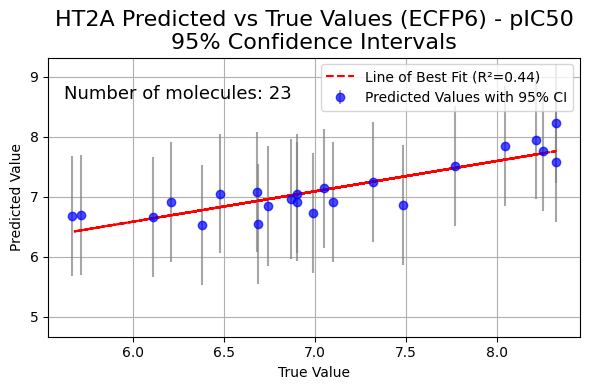

In [ ]:
# Plot with confidence intervals for a specific dataset and descriptor type
plot_predicted_vs_actual_with_error_bars(
    test_set_results,
    dataset_name="df_ic50_od",
    descriptor_type="ecfp6",
    metric="r2"
)

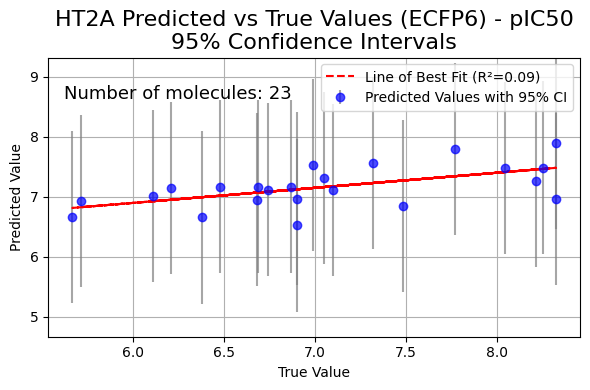

In [ ]:
plot_predicted_vs_actual_with_error_bars(
    test_set_results,
    dataset_name="df_ic50_od",
    descriptor_type="descriptors",
    metric="r2"
)

In [ ]:
import pandas as pd

def calculate_relative_width(lower_bound, upper_bound, predicted):
    """
    Calculate the relative width of the confidence interval.

    Parameters:
    - lower_bound: Lower bound of the confidence interval.
    - upper_bound: Upper bound of the confidence interval.
    - predicted: Predicted value.

    Returns:
    - Relative width of the confidence interval.
    """
    return (upper_bound - lower_bound) / predicted if predicted != 0 else float('inf')

def generate_confidence_intervals_table(test_set_results, dataset_name, descriptor_type='ecfp6'):
    """
    Generate a table of confidence intervals for each molecule in the dataset.

    Parameters:
    - test_set_results: Dictionary with test set evaluation results.
    - dataset_name: Name of the dataset to generate confidence intervals for.
    - descriptor_type: Descriptor type ('ecfp6' or 'descriptors').

    Returns:
    - A pandas DataFrame containing the results.
    """
    results = test_set_results[dataset_name][descriptor_type]
    molecule_ids = results['molecule_ids']
    actual = results['actual']
    predicted = results['predicted']
    lower_bound = results['lower_bound']
    upper_bound = results['upper_bound']

    # Calculate relative width for each molecule
    relative_widths = [
        calculate_relative_width(lb, ub, pred)
        for lb, ub, pred in zip(lower_bound, upper_bound, predicted)
    ]

    # Create a DataFrame
    data = {
        'Molecule ID': molecule_ids,
        'Actual': actual,
        'Predicted': predicted,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Relative Width': relative_widths
    }
    df = pd.DataFrame(data)

    # Sort by Relative Width for better readability (optional)
    df = df.sort_values(by='Relative Width', ascending=False).reset_index(drop=True)

    return df

# Example usage
confidence_intervals_table = generate_confidence_intervals_table(
    test_set_results, dataset_name="df_ic50_od", descriptor_type="ecfp6"
)
confidence_intervals_table.head(10)



,Molecule ID,Actual,Predicted,Lower Bound,Upper Bound,Relative Width
0,CHEMBL484581,6.38,6.528299,5.530471,7.526127,0.305693
1,CHEMBL485625,6.69,6.551840,5.554012,7.549668,0.304595
2,CHEMBL559579,6.11,6.664100,5.666272,7.661928,0.299464
3,CHEMBL550169,5.67,6.681067,5.683239,7.678895,0.298703
4,CHEMBL565234,5.72,6.702683,5.704855,7.700511,0.297740
5,CHEMBL551964,6.99,6.725100,5.727272,7.722928,0.296747
6,CHEMBL485579,6.74,6.852700,5.854872,7.850528,0.291222
7,CHEMBL421027,7.48,6.866950,5.869122,7.864778,0.290618
8,CHEMBL340873,7.10,6.908533,5.910705,7.906361,0.288868
9,CHEMBL456657,6.21,6.919188,5.921360,7.917016,0.288423


In [ ]:
def analyze_relative_widths(confidence_intervals_table):
    """
    Analyze the relative widths of confidence intervals.

    Parameters:
    - confidence_intervals_table: Pandas DataFrame with 'Lower Bound', 'Upper Bound', and 'Predicted Value'.

    Returns:
    - A summary dictionary with mean, median, and standard deviation of relative widths.
    """
    # Calculate relative width for each molecule
    confidence_intervals_table['Relative Width'] = (
        confidence_intervals_table['Upper Bound'] - confidence_intervals_table['Lower Bound']
    ) / confidence_intervals_table['Predicted']

    # Summary statistics
    mean_width = confidence_intervals_table['Relative Width'].mean()
    median_width = confidence_intervals_table['Relative Width'].median()
    std_dev_width = confidence_intervals_table['Relative Width'].std()

    summary = {
        'Mean Relative Width': mean_width,
        'Median Relative Width': median_width,
        'Standard Deviation': std_dev_width
    }

    return summary

# Example usage
summary_stats = analyze_relative_widths(confidence_intervals_table)
print(summary_stats)


{'Mean Relative Width': 0.2814835268320592, 'Median Relative Width': 0.2867232993558065, 'Standard Deviation': 0.017809080638844052}


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def process_datasets_with_ci_4(datasets, mode='both'):
    """
    Process each dataset and train models using both ECFP6 and molecular descriptors,
    with optional hyperparameter optimization and confidence interval calculation.

    Parameters:
    - datasets: Dictionary where keys are dataset names and values are DataFrames.
    - mode: Specify 'without', 'with', or 'both' to control hyperparameter optimization.

    Returns:
    - test_set_results: Dictionary containing evaluation metrics (R², MAE, RMSE) and confidence intervals for each dataset.
    """
    test_set_results = {}

    for dataset_name, df in datasets.items():
        # Prepare data and model results containers
        test_set_results[dataset_name] = {'ecfp6': {'without': {}, 'with': {}}, 'descriptors': {'without': {}, 'with': {}}}

        # Prepare ECFP6 features
        df = add_ecfp6_column(df)
        X_ecfp6, y_ecfp6 = prepare_ml_inputs(df, descriptor_type='ecfp6')

        # Prepare Descriptors features
        X_desc, y_desc = prepare_ml_inputs(df, descriptor_type='descriptors')

        # Train and evaluate for ECFP6
        for descriptor_type, X, y in [('ecfp6', X_ecfp6, y_ecfp6), ('descriptors', X_desc, y_desc)]:
            for hyperopt_status in ['without', 'with']:
                if mode in [hyperopt_status, 'both']:
                    # Train the model
                    model, X_test, y_test = train_model(X, y, hyperopt=(hyperopt_status == 'with'))

                    # Get predictions and calculate evaluation metrics
                    r2, mae, rmse = evaluate_model(model, X_test, y_test)

                    # Calculate actual and predicted values for CI
                    predicted = model.predict(X_test)
                    actual = y_test

                    # Calculate confidence intervals
                    lower_bound, upper_bound, _ = calculate_confidence_intervals(actual, predicted)

                    # Store results for ECFP6 or Descriptors
                    test_set_results[dataset_name][descriptor_type][hyperopt_status] = {
                        'r2': r2, 'mae': mae, 'rmse': rmse,
                        'actual': actual.tolist(),
                        'predicted': predicted.tolist(),
                        'lower_bound': lower_bound.tolist(),
                        'upper_bound': upper_bound.tolist()
                    }

    return test_set_results

def plot_trellis_scatter_with_ci(test_set_results, datasets, dataset_name="df_ic50_od"):
    """
    Create a trellis scatterplot for predicted vs actual values for different descriptor types
    (ECFP6 and descriptors) and optimization modes (with/without hyperparameter tuning),
    including confidence intervals (CI).

    Parameters:
    - test_set_results: Dictionary containing model evaluation metrics and CI results.
    - datasets: Original dataset (with true values) used for training/testing.
    - dataset_name: Name of the dataset to visualize (default 'df_ic50_od').
    """
    descriptor_types = ['ecfp6', 'descriptors']
    opt_conditions = ['without', 'with']
    colors = {
        'ecfp6': ['blue', 'royalblue'],  # ECFP6 with and without optimization
        'descriptors': ['green', 'limegreen']  # Descriptors with and without optimization
    }

    # Create a grid of subplots for trellis plot
    fig, axes = plt.subplots(len(descriptor_types), len(opt_conditions), figsize=(14, 10), sharex=True, sharey=True)
    df = datasets[dataset_name]  # Get dataset to access actual values

    # Loop over each condition (descriptor type, optimization status)
    for row_idx, descriptor_type in enumerate(descriptor_types):
        for col_idx, opt_status in enumerate(opt_conditions):
            ax = axes[row_idx, col_idx]

            # Retrieve evaluation results for the current condition
            results = test_set_results[dataset_name][descriptor_type].get(opt_status, None)
            if results is None:
                continue  # Skip if no results for this condition

            # Get actual and predicted values
            actual = np.array(results['actual'])
            predicted = np.array(results['predicted'])
            r2 = np.array(results['r2'])
            rmse = np.array(results['rmse'])



            # Retrieve confidence intervals
            lower_bound = np.array(results['lower_bound'])
            upper_bound = np.array(results['upper_bound'])


            # Plot scatter plot
            ax.scatter(actual, predicted, alpha=0.7)
            # legend = ax.legend(fontsize=14)

            # Add error bars using confidence intervals
            ax.errorbar(actual, predicted, yerr=[predicted - lower_bound, upper_bound - predicted], fmt='o', alpha=0.5, color='gray')

            # Add a line of best fit using seaborn
            color_line = colors[descriptor_type][col_idx]
            sns.regplot(x=actual, y=predicted, ax=ax, scatter=False, color=color_line, line_kws={"label": "Best Fit"})

            # Set titles and labels
            ax.set_title(f"{descriptor_type.upper()} ({'With' if opt_status == 'with' else 'Without'} Hyperopt) - R²: {r2:.2f}, RMSE:{rmse:.2f}", fontsize=16)
            ax.set_xlabel("Actual Values", fontsize=14)
            ax.set_ylabel("Predicted Values", fontsize=14)

            # Add legend
            ax.legend()

    # Create a custom legend for the colors
    handles = []
    labels = []
    for descriptor_type in descriptor_types:
        for opt_status in opt_conditions:
            color = colors[descriptor_type][opt_conditions.index(opt_status)]  # Get the color for the condition
            label = f"{descriptor_type.upper()} ({'With' if opt_status == 'with' else 'Without'} Hyperopt)"
            handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
            handles.append(handle)
            labels.append(f"{label}")

    # Add the color legend to the plot
    fig.legend(handles, labels, loc='center left', fontsize=12, ncol=1, bbox_to_anchor=(1.02, 0.5))  # Placed outside of the plot

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


In [ ]:
test_set = process_datasets_with_ci_4(datasets)


In [ ]:
# test_set

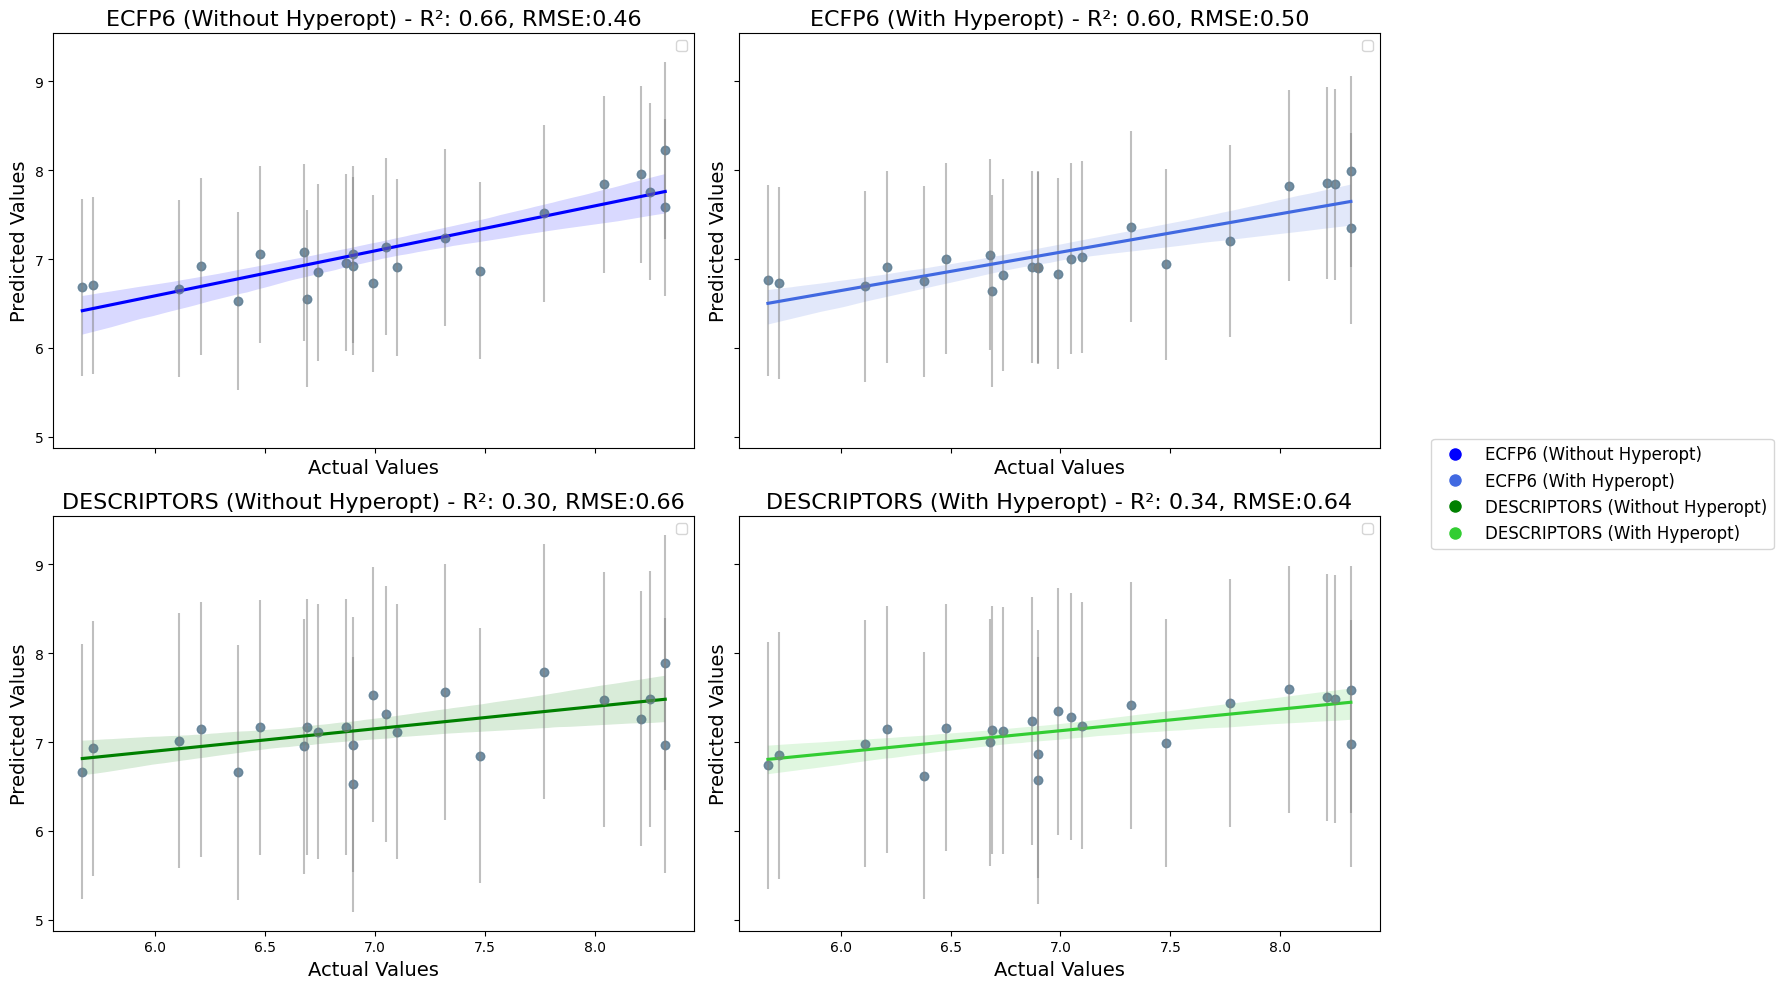

In [ ]:
plot_trellis_scatter_with_ci(test_set, datasets, dataset_name="df_ic50_od")


In [ ]:
def plot_predicted_vs_actual_with_error_bars(test_set_results, dataset_name, descriptor_type='ecfp6', hyperopt_status='without'):
    """
    Plot scatterplot with error bars, line of best fit, and R² value.

    Parameters:
    - test_set_results: Dictionary with test set evaluation results from process_test_sets.
    - dataset_name: Name of the dataset to plot.
    - descriptor_type: Descriptor type ('ecfp6' or 'descriptors').
    - hyperopt_status: 'with' or 'without' hyperparameter optimization.
    """
    # Extract relevant data
    results = test_set_results[dataset_name][descriptor_type][hyperopt_status]
    actual = np.array(results['actual'])
    predicted = np.array(results['predicted'])
    lower_bound = np.array(results['lower_bound'])
    upper_bound = np.array(results['upper_bound'])
    r2 = results['r2']  # Access R² directly from the test_set_results dictionary

    # Calculate line of best fit
    slope, intercept, _, _, _ = linregress(actual, predicted)
    line_best_fit = slope * actual + intercept

    # Scatter plot with confidence intervals
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.errorbar(
        actual, predicted, yerr=[predicted - lower_bound, upper_bound - predicted],
        fmt='o', color='blue', alpha=0.7, label='Predicted Values with 95% CI'
    )

    # Line of best fit
    ax.plot(actual, line_best_fit, color='red', linestyle='--', label=f'Line of Best Fit (R²={r2:.2f})')

    # Customize plot
    ax.set_xlabel('True Value')
    ax.set_ylabel('Predicted Value')
    ax.set_title(f"Predicted vs True Values ({descriptor_type.capitalize()} - {hyperopt_status.capitalize()})")
    ax.legend()
    ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_predicted_vs_actual_with_error_bars(test_set, 'df_ic50_od')

In [ ]:
def process_datasets(datasets, mode='both'):
    test_set_results = {}

    for dataset_name, df in datasets.items():
        # Prepare data
        df = add_ecfp6_column(df)
        X_ecfp6, y_ecfp6 = prepare_ml_inputs(df, descriptor_type='ecfp6')
        molecule_ids = df['Molecule ChEMBL ID'].values  # Assuming molecule IDs are stored here.

        # Train and evaluate model for ECFP6
        model_ecfp6, results_ecfp6 = train_model_with_results(X_ecfp6, y_ecfp6, molecule_ids, hyperopt=False)
        test_set_results[dataset_name] = {
            'ecfp6': results_ecfp6
        }

        # Repeat for descriptors
        X_desc, y_desc = prepare_ml_inputs(df, descriptor_type='descriptors')
        model_desc, results_desc = train_model_with_results(X_desc, y_desc, molecule_ids, hyperopt=False)
        test_set_results[dataset_name]['descriptors'] = results_desc

    return test_set_results